<a href="https://colab.research.google.com/github/Thavatharani06/231801180_PODS/blob/main/EX3_Model_Planning_and_Building_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
TV           0
radio        0
newspaper    0
sales        0
dtype: int64


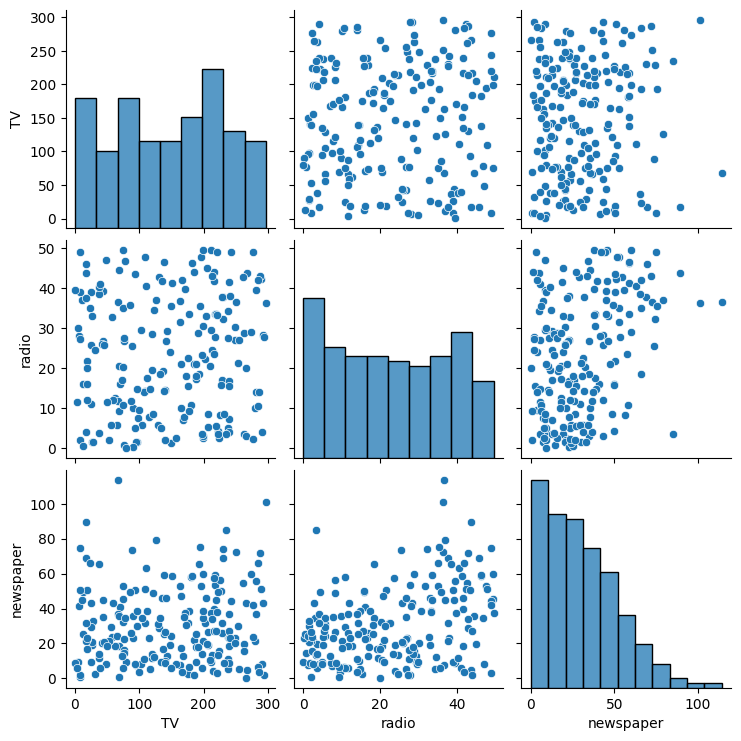

Linear Regression MAE: 1.461, MSE: 3.174, RMSE: 1.782
Polynomial Regression MAE: 0.526, MSE: 0.413, RMSE: 0.643
SVR MAE: 1.162, MSE: 2.862, RMSE: 1.692


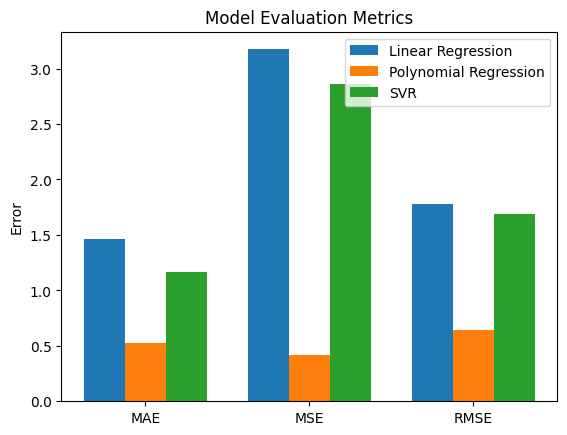

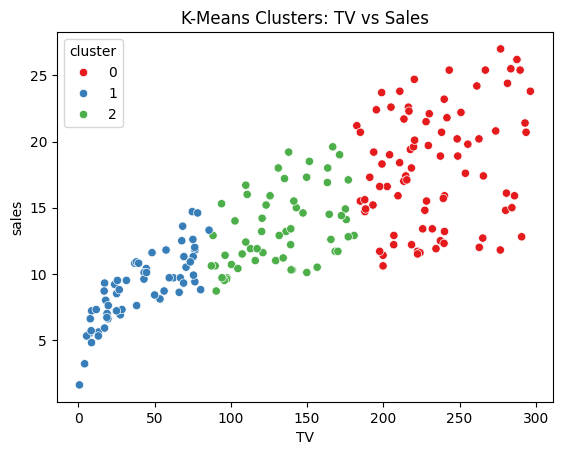

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.cluster import KMeans

url = 'https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv'
df = pd.read_csv(url)
df.drop(columns=['Unnamed: 0'], inplace=True)
print(df.info())
print(df.isnull().sum())

features = ['TV', 'radio', 'newspaper']
target = 'sales'

sns.pairplot(df[features])
plt.show()

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

poly_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear_regression', LinearRegression())
])
poly_pipeline.fit(X_train, y_train)
y_pred_poly = poly_pipeline.predict(X_test)

svr_pipeline = make_pipeline(StandardScaler(), SVR(kernel='rbf'))
svr_pipeline.fit(X_train, y_train)
y_pred_svr = svr_pipeline.predict(X_test)

def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

lr_metrics = evaluate(y_test, y_pred_lr)
poly_metrics = evaluate(y_test, y_pred_poly)
svr_metrics = evaluate(y_test, y_pred_svr)

print(f"Linear Regression MAE: {lr_metrics[0]:.3f}, MSE: {lr_metrics[1]:.3f}, RMSE: {lr_metrics[2]:.3f}")
print(f"Polynomial Regression MAE: {poly_metrics[0]:.3f}, MSE: {poly_metrics[1]:.3f}, RMSE: {poly_metrics[2]:.3f}")
print(f"SVR MAE: {svr_metrics[0]:.3f}, MSE: {svr_metrics[1]:.3f}, RMSE: {svr_metrics[2]:.3f}")

metrics = ['MAE', 'MSE', 'RMSE']
lr_vals = lr_metrics
poly_vals = poly_metrics
svr_vals = svr_metrics
x = np.arange(len(metrics))
width = 0.25

fig, ax = plt.subplots()
ax.bar(x - width, lr_vals, width, label='Linear Regression')
ax.bar(x, poly_vals, width, label='Polynomial Regression')
ax.bar(x + width, svr_vals, width, label='SVR')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylabel('Error')
ax.set_title('Model Evaluation Metrics')
ax.legend()
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df[features])

sns.scatterplot(data=df, x='TV', y='sales', hue='cluster', palette='Set1')
plt.title('K-Means Clusters: TV vs Sales')
plt.show()
